# Regression models

In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X, y = datasets.load_diabetes(return_X_y=True)

model = LinearRegression()

cross_val_score(model, X, y, cv=3, scoring='neg_root_mean_squared_error')

array([-55.08394885, -57.03688847, -52.85825094])

In [3]:
# r2 score popular from statistics can also be reported
cross_val_score(model, X, y, cv=3, scoring='r2')

array([0.46930418, 0.48725261, 0.50954961])

# Classification Models

In [3]:
from sklearn.metrics import accuracy_score

y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

accuracy_score(y_true, y_pred)

0.5

In [4]:
# You can calculate the F1-Score as follows:

In [5]:
from sklearn.metrics import f1_score

y_pred = [0, 1, 1, 0]
y_true = [0, 1, 0, 1]

f1_score(y_true, y_pred)

0.5

In [6]:
from sklearn.metrics import confusion_matrix

y_pred = [0, 1, 1, 0]
y_true = [0, 1, 1, 1]

cm = confusion_matrix(y_true, y_pred)

print('Confusion matrix:\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix:
 [[1 0]
 [1 2]]

True Positives(TP) =  1
True Negatives(TN) =  2
False Positives(FP) =  0
False Negatives(FN) =  1


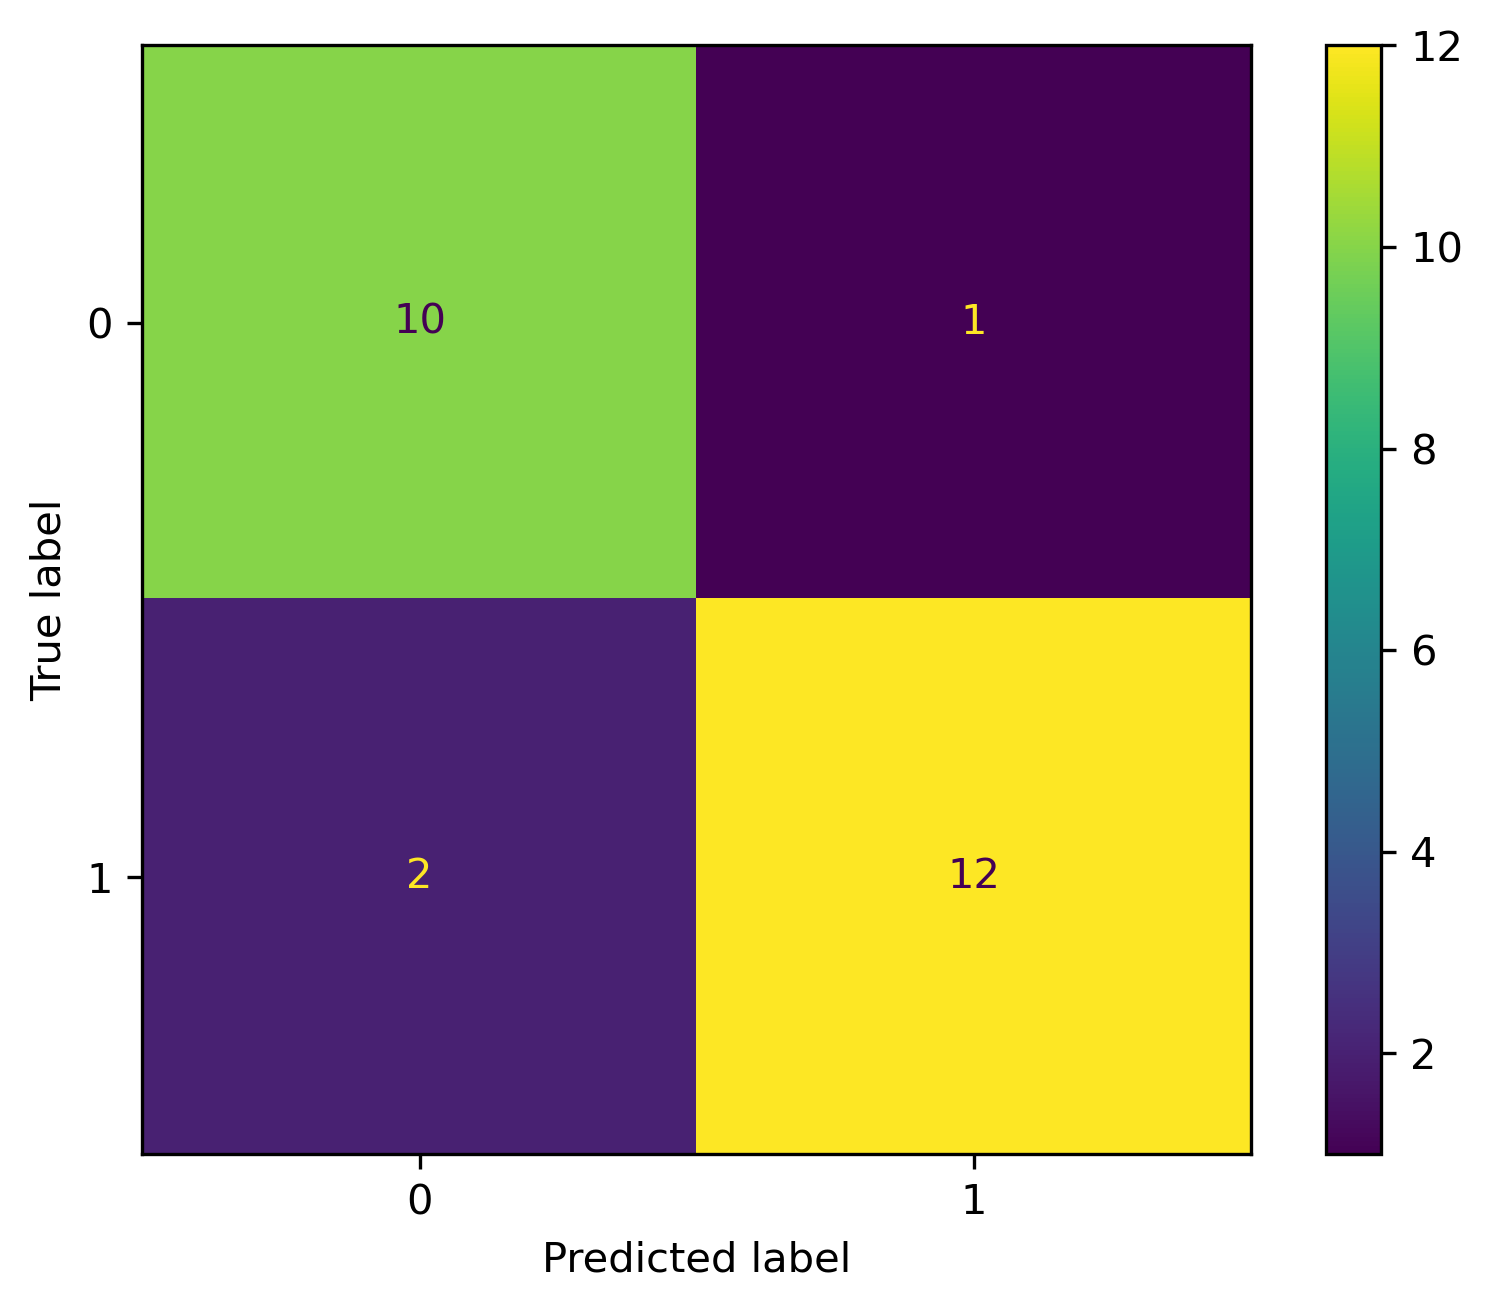

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC().fit(X_train, y_train)

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot(); 

In [8]:
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]

target_names = ['class 0', 'class 1', 'class 2']

print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



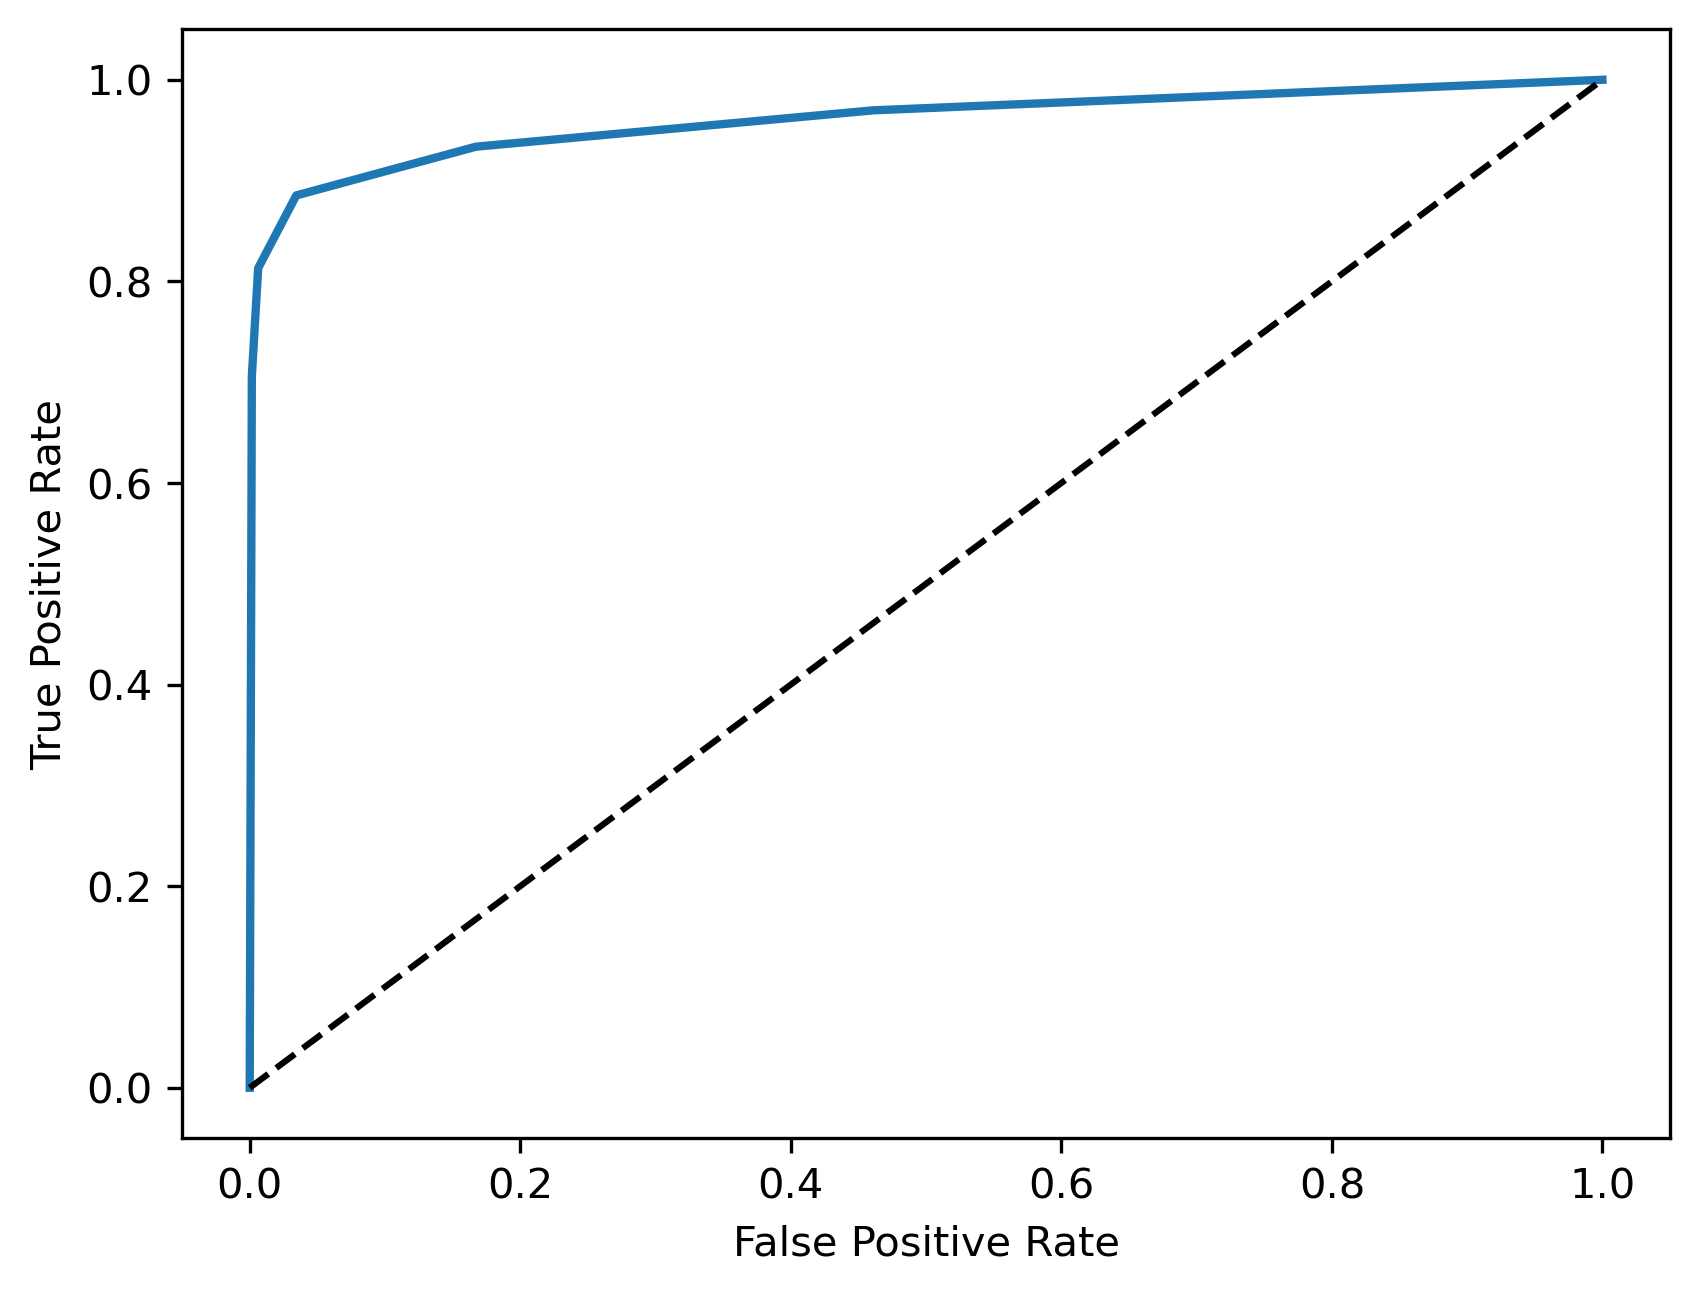

In [9]:
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(n_samples=10000)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)

In [11]:
for a,b,c in zip(thresholds, fpr, tpr):
    print(a,b,c)

inf 0.0 0.0
1.0 0.0015625 0.7057377049180328
0.8 0.00625 0.8131147540983606
0.6 0.034375 0.8852459016393442
0.4 0.1671875 0.9336065573770492
0.2 0.4609375 0.969672131147541
0.0 1.0 1.0


In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = SVC().fit(X_train, y_train)

roc_auc_score(y_test, model.predict(X_test))

0.8333333333333333

In [13]:
# More performance metrics at:
# https://scikit-learn.org/stable/modules/model_evaluation.html

In [14]:
# --->> Your Turn <<<---
# plot the precision-recall curve 
# and caluclate the AUC-PR for a random forest classifier
# and precision, recall and f1 as a function of the threshold

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

# Generate a binary classification dataset with class imbalance
X, y = make_classification(n_samples=10000,random_state=0, weights=[0.9, 0.1])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("the proportion of positives in test",np.sum(y_test==1)/len(y_test),"will give us the chance level of precision")

the proportion of positives in test 0.1004 will give us the chance level of precision


AUC-PR:  0.472264386357011 AUC-ROC:  0.7843627712360872


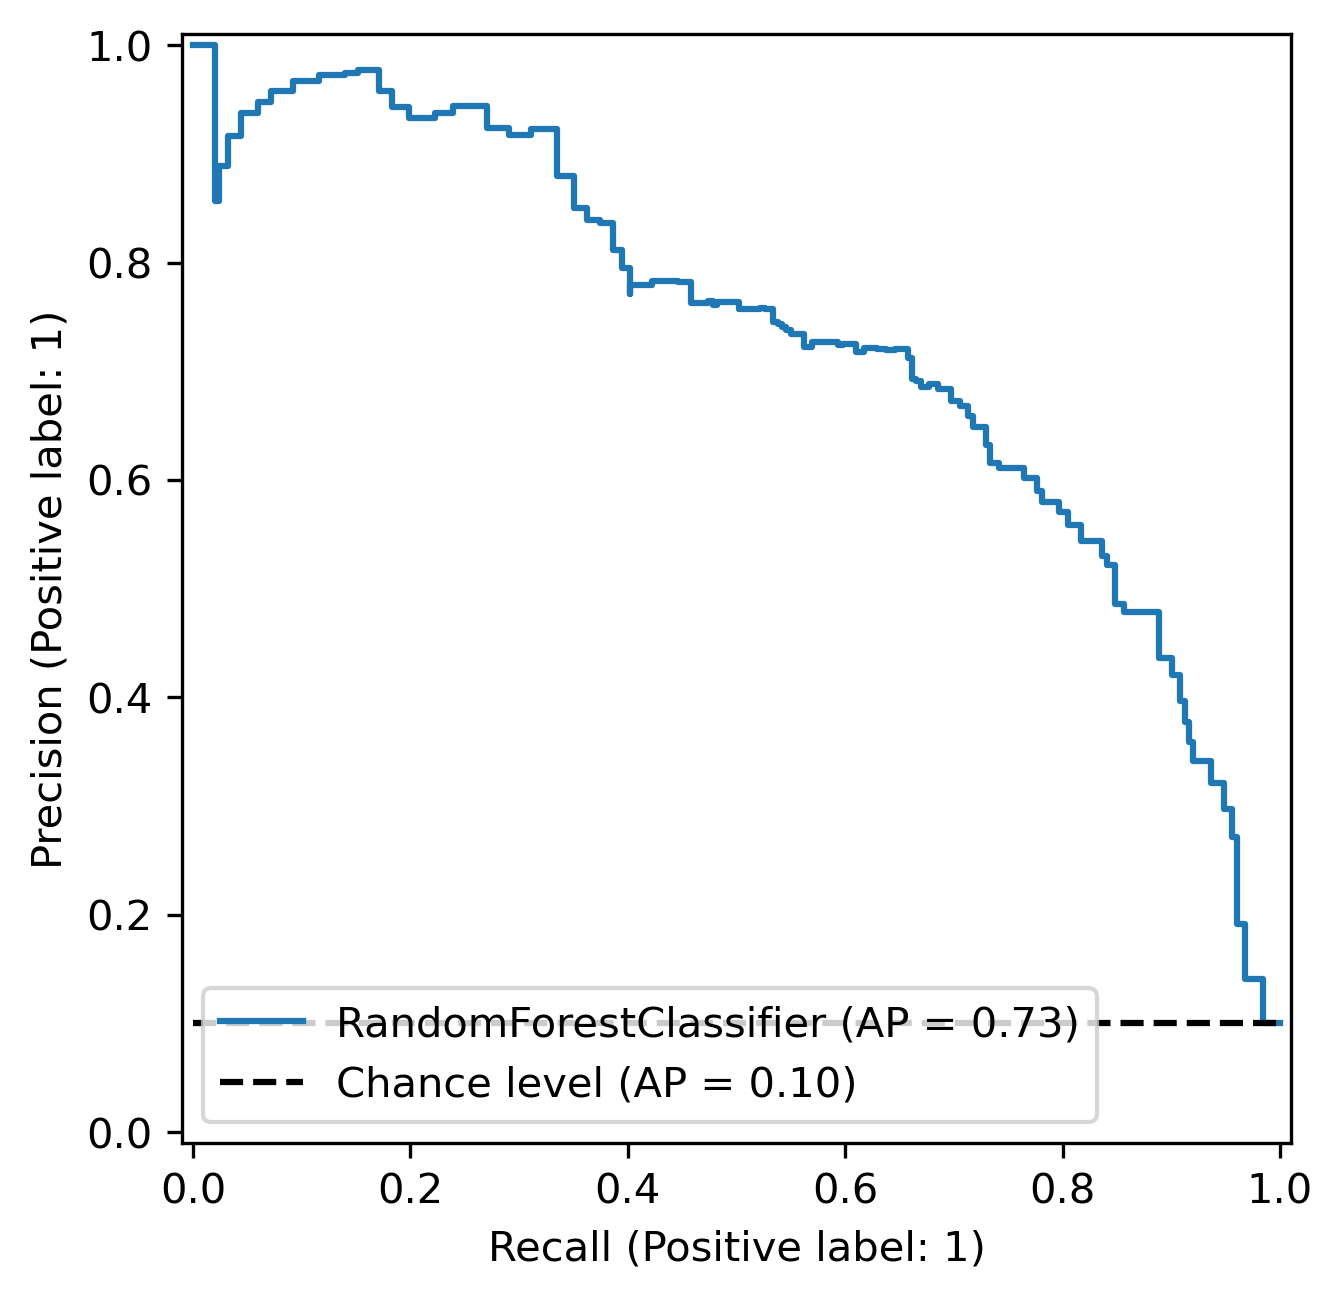

In [15]:
model = RandomForestClassifier().fit(X_train, y_train)

from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test, y_test, plot_chance_level=True)

# Calculate AUC-PR score
y_pred = model.predict(X_test)
auc_pr = average_precision_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model.predict(X_test))
print("AUC-PR: ", auc_pr, "AUC-ROC: ", auc_roc)


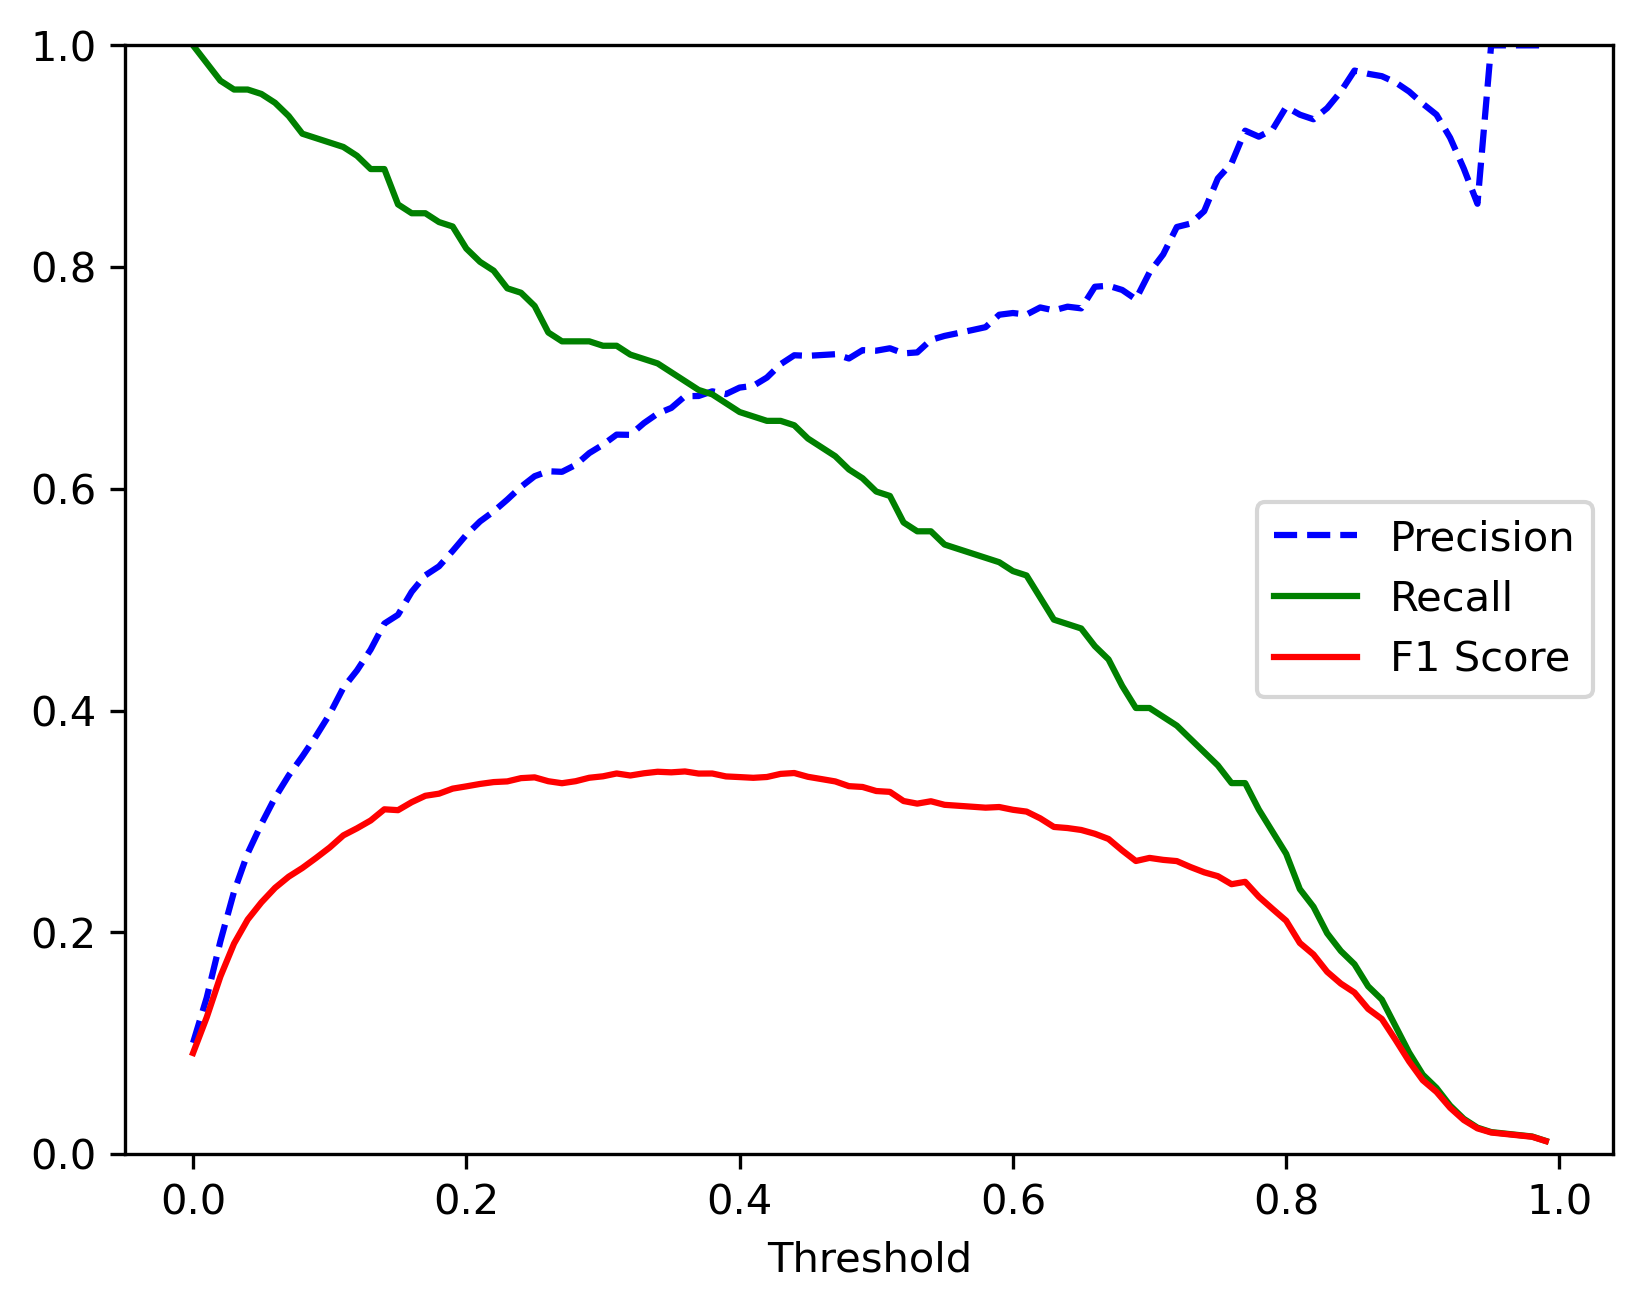

In [16]:
#plot precision, recall and F1 vs. threshold
from sklearn.metrics import precision_recall_curve
y_pred = model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.plot(thresholds, (precisions*recalls/(precisions+recalls))[:-1], "r-", label="F1 Score")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])
plt.show()  

In [17]:
# --->> Your Turn <<<---
# How would you shift the decision threshold if
# a) the cost of false negatives is much higher than the cost of false positives?
# b) the cost of false positives is much higher than the cost of false negatives?

# a) shift threshold to the left
# b) shift threshold to the right

# see more on adjusting decision thresholds
# https://scikit-learn.org/stable/modules/classification_threshold.html